# Credit card approval prediction
In this notebook, we will build an automatic credit card approval predictor using machine learning techniques.
We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository and build a machine learning model that can predict if an individual's application for a credit card will be accepted.
This is a **binary classification problem.**

#### Data Set Information:

 - All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 

 - This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.


Attribute Information:

- A1:	b, a. 
- A2:	continuous. 
- A3:	continuous. 
- A4:	u, y, l, t. 
- A5:	g, p, gg. 
- A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
- A7:	v, h, bb, j, n, z, dd, ff, o. 
- A8:	continuous. 
- A9:	t, f. 
- A10:	t, f. 
- A11:	continuous. 
- A12:	t, f. 
- A13:	g, p, s. 
- A14:	continuous. 
- A15:	continuous. 
- A16: +,- (class attribute)
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("credit_card_data.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
print('The dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset has 690 rows and 16 columns


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [5]:
# Summary statistics of numeric columns with no missing values
data.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


As you can see in the summary statistic above, the numeric features have different scales. This tells us that one must normalise the data before using any algorithm that uses *distances*.

In [6]:
# Map the target column into 0's (for not approved) and 1's (for approved)
data[15] = data[15].apply(lambda approval: 1 if approval == '+' else 0)

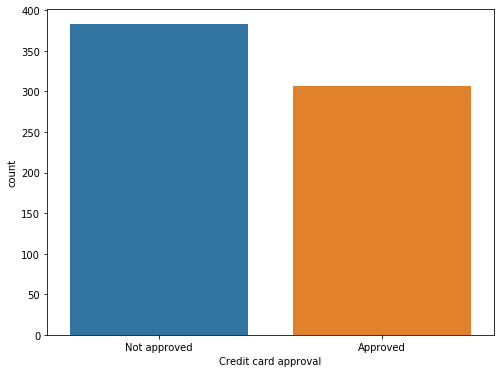

In [7]:
plt.figure(figsize=(8,6))
_ = sns.countplot(data[15])
_ = plt.xlabel('Credit card approval')
_ = plt.xticks([0,1],['Not approved', 'Approved'])


 - There isn't a huge imbalance in the response variable, which is good news! Also note that the majority of credit card applications were not approved. This shows that banks can be choosy while giving out unsecured loans.

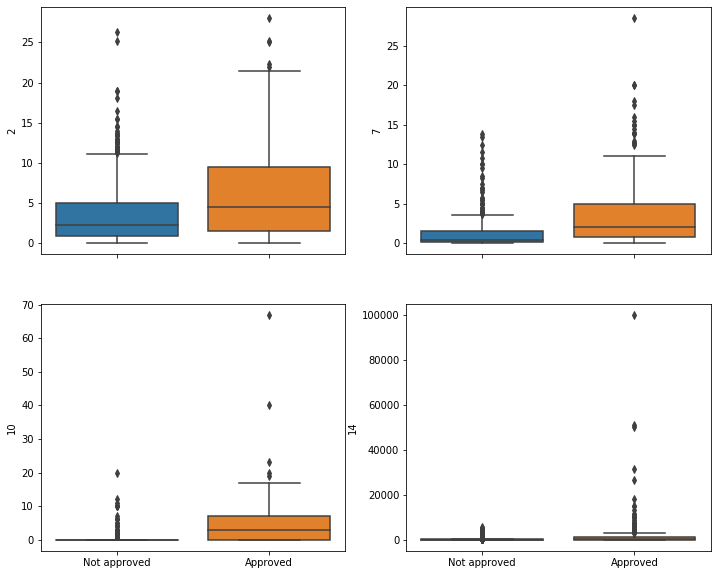

In [8]:
# basic EDA of the numeric features
fig,ax = plt.subplots(2,2,sharex=True,figsize=(12,10))
sns.boxplot(x=data[15],y=data[2], ax=ax[0,0])
sns.boxplot(x=data[15],y=data[7],ax=ax[0,1])
sns.boxplot(x=data[15],y=data[10],ax=ax[1,0])
sns.boxplot(x=data[15],y=data[14],ax=ax[1,1])

_ =plt.xticks([0,1],['Not approved', 'Approved'])
_ = ax[0,0].set_xlabel('')
_ =ax[0,1].set_xlabel('')
_ =ax[1,0].set_xlabel('')
_ =ax[1,1].set_xlabel('')


Skewness of feature 7: 2.891330424153805
Skewness of feature 10: 5.152519857445985


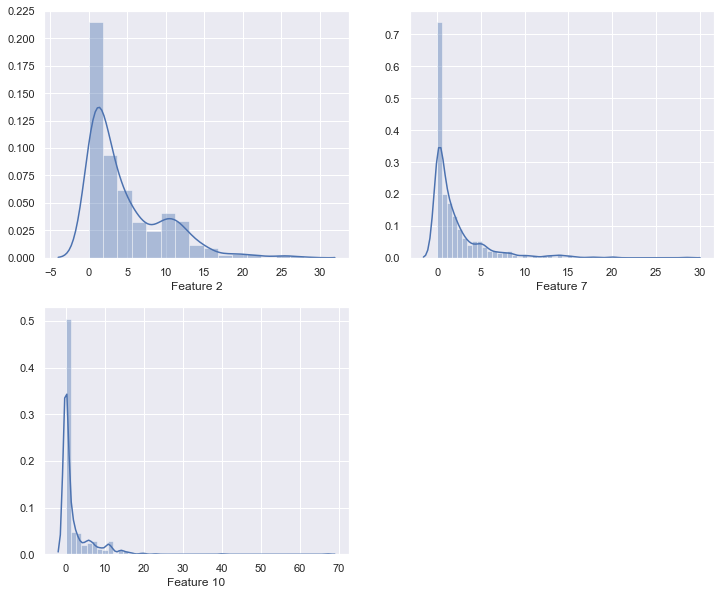

In [9]:
## Check the distribution of the numeric features
sns.set()
fig,ax = plt.subplots(2,2,figsize=(12,10))
sns.distplot(data[2],bins=15, ax=ax[0,0])
sns.distplot(data[7], ax=ax[0,1])
sns.distplot(data[10], ax=ax[1,0])
fig.delaxes(ax[1,1])
_ =ax[0,0].set_xlabel('Feature 2')
_ =ax[0,1].set_xlabel('Feature 7')
_ =ax[1,0].set_xlabel('Feature 10')

print('Skewness of feature 7: {}'.format(data[7].skew()))
print('Skewness of feature 10: {}'.format(data[10].skew()))

 - Are these features normally distributed? No! Feature 2 is bimodal in nature, features 7 has a significant positive skew, and feature 10 is also postively skewed with a long tail.

### Missing values
 - The missing values in this dataset are encoded as '?'. We first convert these to NaN's since they are easy to manipulate with standard Pandas methods.

In [10]:
#data[data == '?'] = np.nan
data.replace(to_replace='?',value=np.nan, inplace=True)

In [11]:
# Convert columns 1 and 13 to numeric type. Because of missing values, their dtype was determined as 'object' by Pandas.
data[1] = pd.to_numeric(data[1])
data[13] = pd.to_numeric(data[13])

In [12]:
#How many mising values are there in the dataset?
data.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [13]:
data.fillna(data.mean(),inplace=True)

In [14]:
# cat_cols : columns with categorical data
cat_cols = data.select_dtypes(include=[object]).columns
for col in cat_cols:
# Impute with the most frequent value or the mode
    data[col] = data[col].fillna(data[col].value_counts().index[0])

In [15]:
# Is there any more missing value left?
print('Number of missing values in the dataset = ',data.isna().sum().sum())

Number of missing values in the dataset =  0


In [16]:
#data = pd.get_dummies(data=data,drop_first=True,prefix='is')
#One-hot encoding showed bad performance that's why I used label encoding.

In [17]:
X = data.drop(15,axis=1) #feature set
y = data[15] # target variable

In [18]:
# Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype=='object':
        X[col]=le.fit_transform(X[col])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=13)

In [21]:
print('The training set has {} rows and {} columns'.format(X_train.shape[0],X_train.shape[1]))
print('The test set has {} rows and {} columns'.format(X_test.shape[0],X_test.shape[1]))

The training set has 483 rows and 15 columns
The test set has 207 rows and 15 columns


### Modelling

In [22]:
# Import relevant ML packages from scikit-learn
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category=Warning)

In [23]:
def generate_report(clf, y_pred,clf_name='classifier'):
    '''Generates classification report and shows the best fit parameters
    from a GridSearchCV object'''
    print("Accuracy of {}: {}".format(clf_name, clf.score(X_test, y_test)))
    print(classification_report(y_test, y_pred))
    print("Tuned Model Parameters: {}".format(clf.best_params_))

The strategy is as follows:
 - We will make a pipeline with two steps, first the standardization of the data and then applying the classfier.
 - We will pass this pipeline object to GridSearchCV for hyperparameter tuning using cross-validation.
 - The classifier will then be fitted to the training data using the best-fit hyperparameters.
 - We finally test our model on the hold-out set, i.e., the test data.

#### Logistic regression:

In [24]:
# Setup the pipeline
#steps = [('Imputer', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)), ('scaler', StandardScaler()),
#         ('Logreg', LogisticRegression())]

steps = [('scaler', StandardScaler()),
         ('Logreg', LogisticRegression(solver='lbfgs'))]
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'Logreg__C':[0.01, 0.05, 0.08, 0.1,0.5,1],
              'Logreg__max_iter':[50,100,500]}

logreg = GridSearchCV(pipeline,parameters, cv =5)
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred_logreg = logreg.predict(X_test)

# Compute and print metrics
generate_report(logreg,y_pred_logreg,'Logreg')

Accuracy of Logreg: 0.8599033816425121
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       112
           1       0.84      0.86      0.85        95

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Tuned Model Parameters: {'Logreg__C': 0.5, 'Logreg__max_iter': 50}


#### Support Vector machine:

In [25]:
steps = [('scaler', StandardScaler()),
         ('SVC', SVC())]
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVC__C':[0.1,0.2, 0.3, 0.4, 0.5,1, 10]}
svm = GridSearchCV(pipeline,parameters, cv = 5)
svm.fit(X_train,y_train)
y_pred_SVM = svm.predict(X_test)
generate_report(svm,y_pred_SVM,'SVM')


Accuracy of SVM: 0.8502415458937198
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       112
           1       0.82      0.86      0.84        95

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Tuned Model Parameters: {'SVC__C': 0.3}


#### K-nearest Neighbours:

In [26]:
steps = [('scaler', StandardScaler()),
         ('KNN', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'KNN__n_neighbors':range(1,20)}

knn = GridSearchCV(pipeline,parameters, cv = 5)
knn.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred_KNN = knn.predict(X_test)

generate_report(knn,y_pred_KNN, 'KNN')

Accuracy of KNN: 0.8357487922705314
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       112
           1       0.88      0.75      0.81        95

    accuracy                           0.84       207
   macro avg       0.84      0.83      0.83       207
weighted avg       0.84      0.84      0.83       207

Tuned Model Parameters: {'KNN__n_neighbors': 7}


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [28]:
steps = [('scaler', StandardScaler()),
         ('NB', GaussianNB())]
pipeline = Pipeline(steps)

cv_scores_NB = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print('Mean CV score (Accuracy): {}'.format(round(cv_scores_NB.mean(),2)))
pipeline.fit(X_train,y_train)
y_pred_NB = pipeline.predict(X_test)

print('Accuracy = {}%'.format(round(accuracy_score(y_test,y_pred_NB),3)*100))
print(classification_report(y_test, y_pred_NB))

Mean CV score (Accuracy): 0.82
Accuracy = 80.7%
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       112
           1       0.88      0.67      0.76        95

    accuracy                           0.81       207
   macro avg       0.82      0.80      0.80       207
weighted avg       0.82      0.81      0.80       207



#### Stacking:
Although stacking is not the focus of this notebook, I'm trying it out just for fun.

In [29]:
from mlxtend.classifier import StackingCVClassifier

In [30]:
sclf = StackingCVClassifier(classifiers=[logreg, svm, knn],
                            meta_classifier=logreg,
                            random_state=42)

print('5-fold cross validation:\n')

for clf, label in zip([logreg, svm, knn, sclf], 
                      ['logistic regression', 
                       'SVM', 
                       'KNN',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X_train, y_train, 
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.872 (+/- 0.032) [logistic regression]
Accuracy: 0.857 (+/- 0.029) [SVM]
Accuracy: 0.845 (+/- 0.031) [KNN]
Accuracy: 0.866 (+/- 0.034) [StackingClassifier]


In [31]:
sclf.fit(X_train,y_train)
y_pred_stack = sclf.predict(X_test)
print('Accuracy = {}%'.format(round(accuracy_score(y_test,y_pred_stack),3)*100))

Accuracy = 87.0%


In this particular problem, stacking didn't improve the performance of the model. Logistic regression delivered the best performance out of the three classifiers I experimented with. Although the accuracies were comparable, the recall of the positive class (credit card approved) was low for k-nearest neighbours and Naive Bayes. 

I did not use any tree-based classifiers to keep the modelling part simple. Besides, the dataset was also relatively small.